In [0]:
!unzip train.zip
!pip install -U scikit-learn

In [0]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from skimage.transform import resize
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

The next cell reads the images then reshape them to 90x90 and computes the feature descriptor for it.

Note: Please make sure that the working directory contains the train directory of the dataset, before running this.

In [0]:
trainDir='./train'
directories = os.listdir(trainDir)
image_height=90
image_width=90
count = 0;
for i in range(len(directories)):
    for file in os.listdir(trainDir+'/'+directories[i]):
        count+=1
orientation=9
pixels_per_cell=9
cells_per_block=2
# the final length of the feature vector
featureDescriptorLen = (orientation*cells_per_block*cells_per_block)*((image_height/pixels_per_cell)-cells_per_block+1)*((image_width/pixels_per_cell)-cells_per_block+1)
x_train = np.empty(shape=(count,int(featureDescriptorLen)))
y_train = np.zeros(count,dtype='int32')
y_originalNames = {}
count = 0
label = 0
for i in range(len(directories)):
    for file in os.listdir(trainDir+'/'+directories[i]):
        image = cv2.imread(trainDir+'/'+directories[i]+'/'+file,0)
        featureDescriptor, hog_image = hog(resize(image,(image_height,image_width)), orientations=orientation, 
                    pixels_per_cell=(pixels_per_cell, pixels_per_cell), 
                    cells_per_block=(cells_per_block, cells_per_block), visualize=True)
        x_train[count] = featureDescriptor
        y_train[count] = label
        y_originalNames[label] = directories[i]
        count+=1
    label+=1
        

Plot the the last image read and its corresponding hog image.

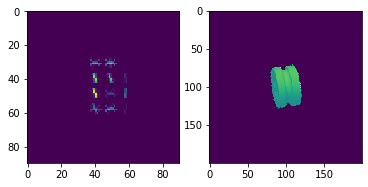

In [25]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,2)
axarr[0].imshow(hog_image)
axarr[1].imshow(image)

Shuffle the data since it was read in order of labels.

In [26]:
shuffle = np.arange(x_train.shape[0])
np.random.shuffle(shuffle)
print(shuffle)
x_train=x_train[shuffle]
y_train=y_train[shuffle]

[2005 4075 3321 ... 1952 5561 1744]


In [0]:

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2)

This cell creates an SVM classifier for every possible combination of the parameters. In this case, there are 4 possibilities

Note: this takes a lot of time to train(~25 minutes)

In [28]:

parameters = {'kernel':('linear', 'rbf'), 'C':[1,100]}
svm_model = svm.SVC() 
clf2 = GridSearchCV(svm_model, parameters,scoring='accuracy',cv=5,n_jobs=-1)
clf2.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Next 3 cells evaluates the best classifier obtained with the above parameters.

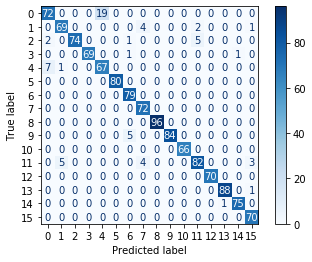

In [29]:
disp = plot_confusion_matrix(clf2, X_test, Y_test,
                                 cmap=plt.cm.Blues)


In [30]:
print('Best SVC was obtained with the following parameters:',clf2.best_params_)
print('Best score obtained',clf2.best_score_)


Best SVC was obtained with the following parameters: {'C': 100, 'kernel': 'rbf'}
Best score obtained 0.9329824662480076


In [31]:
predicted_labels = clf2.predict(X_test)
print('Accuracy score obtained on test data',accuracy_score(predicted_labels,Y_test))


Accuracy score obtained on test data 0.950626959247649


This cell check if exists a better C for the classifier which uses 'rbf' as a kernel function.

In [32]:
parameters = {'kernel':['rbf'], 'C':[0.1,1,10,100]}
svm_model3 = svm.SVC() 
clf3 = GridSearchCV(svm_model3, parameters,scoring='accuracy',cv=5,n_jobs=-1)
clf3.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Evaluating the 2nd classifier

Best SVC was obtained with the following parameters: {'C': 10, 'kernel': 'rbf'}
Best score obtained 0.9333746231107527
Accuracy score obtained on test data 0.9482758620689655


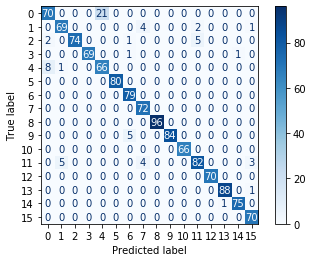

In [33]:
disp = plot_confusion_matrix(clf3, X_test, Y_test,cmap=plt.cm.Blues)
print('Best SVC was obtained with the following parameters:',clf3.best_params_)
print('Best score obtained',clf3.best_score_)
predicted_labels = clf3.predict(X_test)
print('Accuracy score obtained on test data',accuracy_score(predicted_labels,Y_test))


Get the best classifier with kernel function 'poly'

In [34]:
parameters2 = {'kernel':['poly'], 'C':[1,100],'degree':(3,4)}
svm_model2 = svm.SVC() 
clf = GridSearchCV(svm_model2, parameters2,scoring='accuracy',cv=5,n_jobs=-1)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 100], 'degree': (3, 4), 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Best SVC was obtained with the following parameters: {'C': 100, 'degree': 3, 'kernel': 'poly'}
Best score obtained 0.9318056115688196
Accuracy score obtained on test data 0.9467084639498433


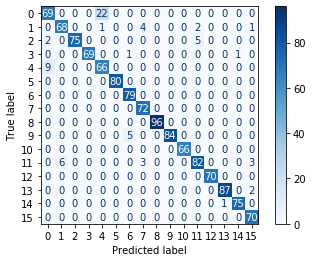

In [35]:
disp = plot_confusion_matrix(clf, X_test, Y_test,cmap=plt.cm.Blues)
print('Best SVC was obtained with the following parameters:',clf.best_params_)
print('Best score obtained',clf.best_score_)
predicted_labels = clf.predict(X_test)
print('Accuracy score obtained on test data',accuracy_score(predicted_labels,Y_test))
